In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets

In [2]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [3]:
base_df=pd.read_csv('concrete.csv')

# Exploratory Data Quality Report 

## Univariate Analysis 

In [4]:
print(base_df.head(10))
print("Data types")
print(base_df.info())
print()
print(base_df.describe())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99  
Data types
<class 'pandas.core.frame.DataF

In [5]:
df=base_df

In [6]:
# Feature Engineering 

df['weight']=df.iloc[:, 0:7].values.sum(axis=1)
print(df.iloc[0:1, 0:7].sum(axis=1))

0    2277.1
dtype: float64


In [7]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'weight'],
      dtype='object')

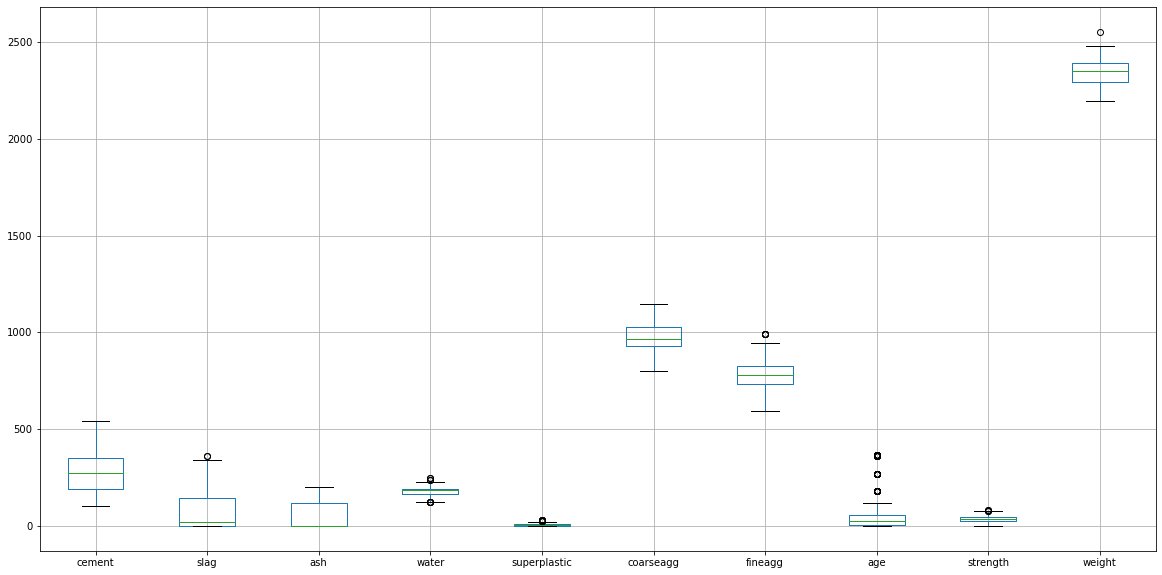

In [8]:
plt.figure(figsize=(20,10)) #boxplot used to identify outliers
base_df.boxplot()

df=base_df # base_df will not be modified


# Bi-variate analysis

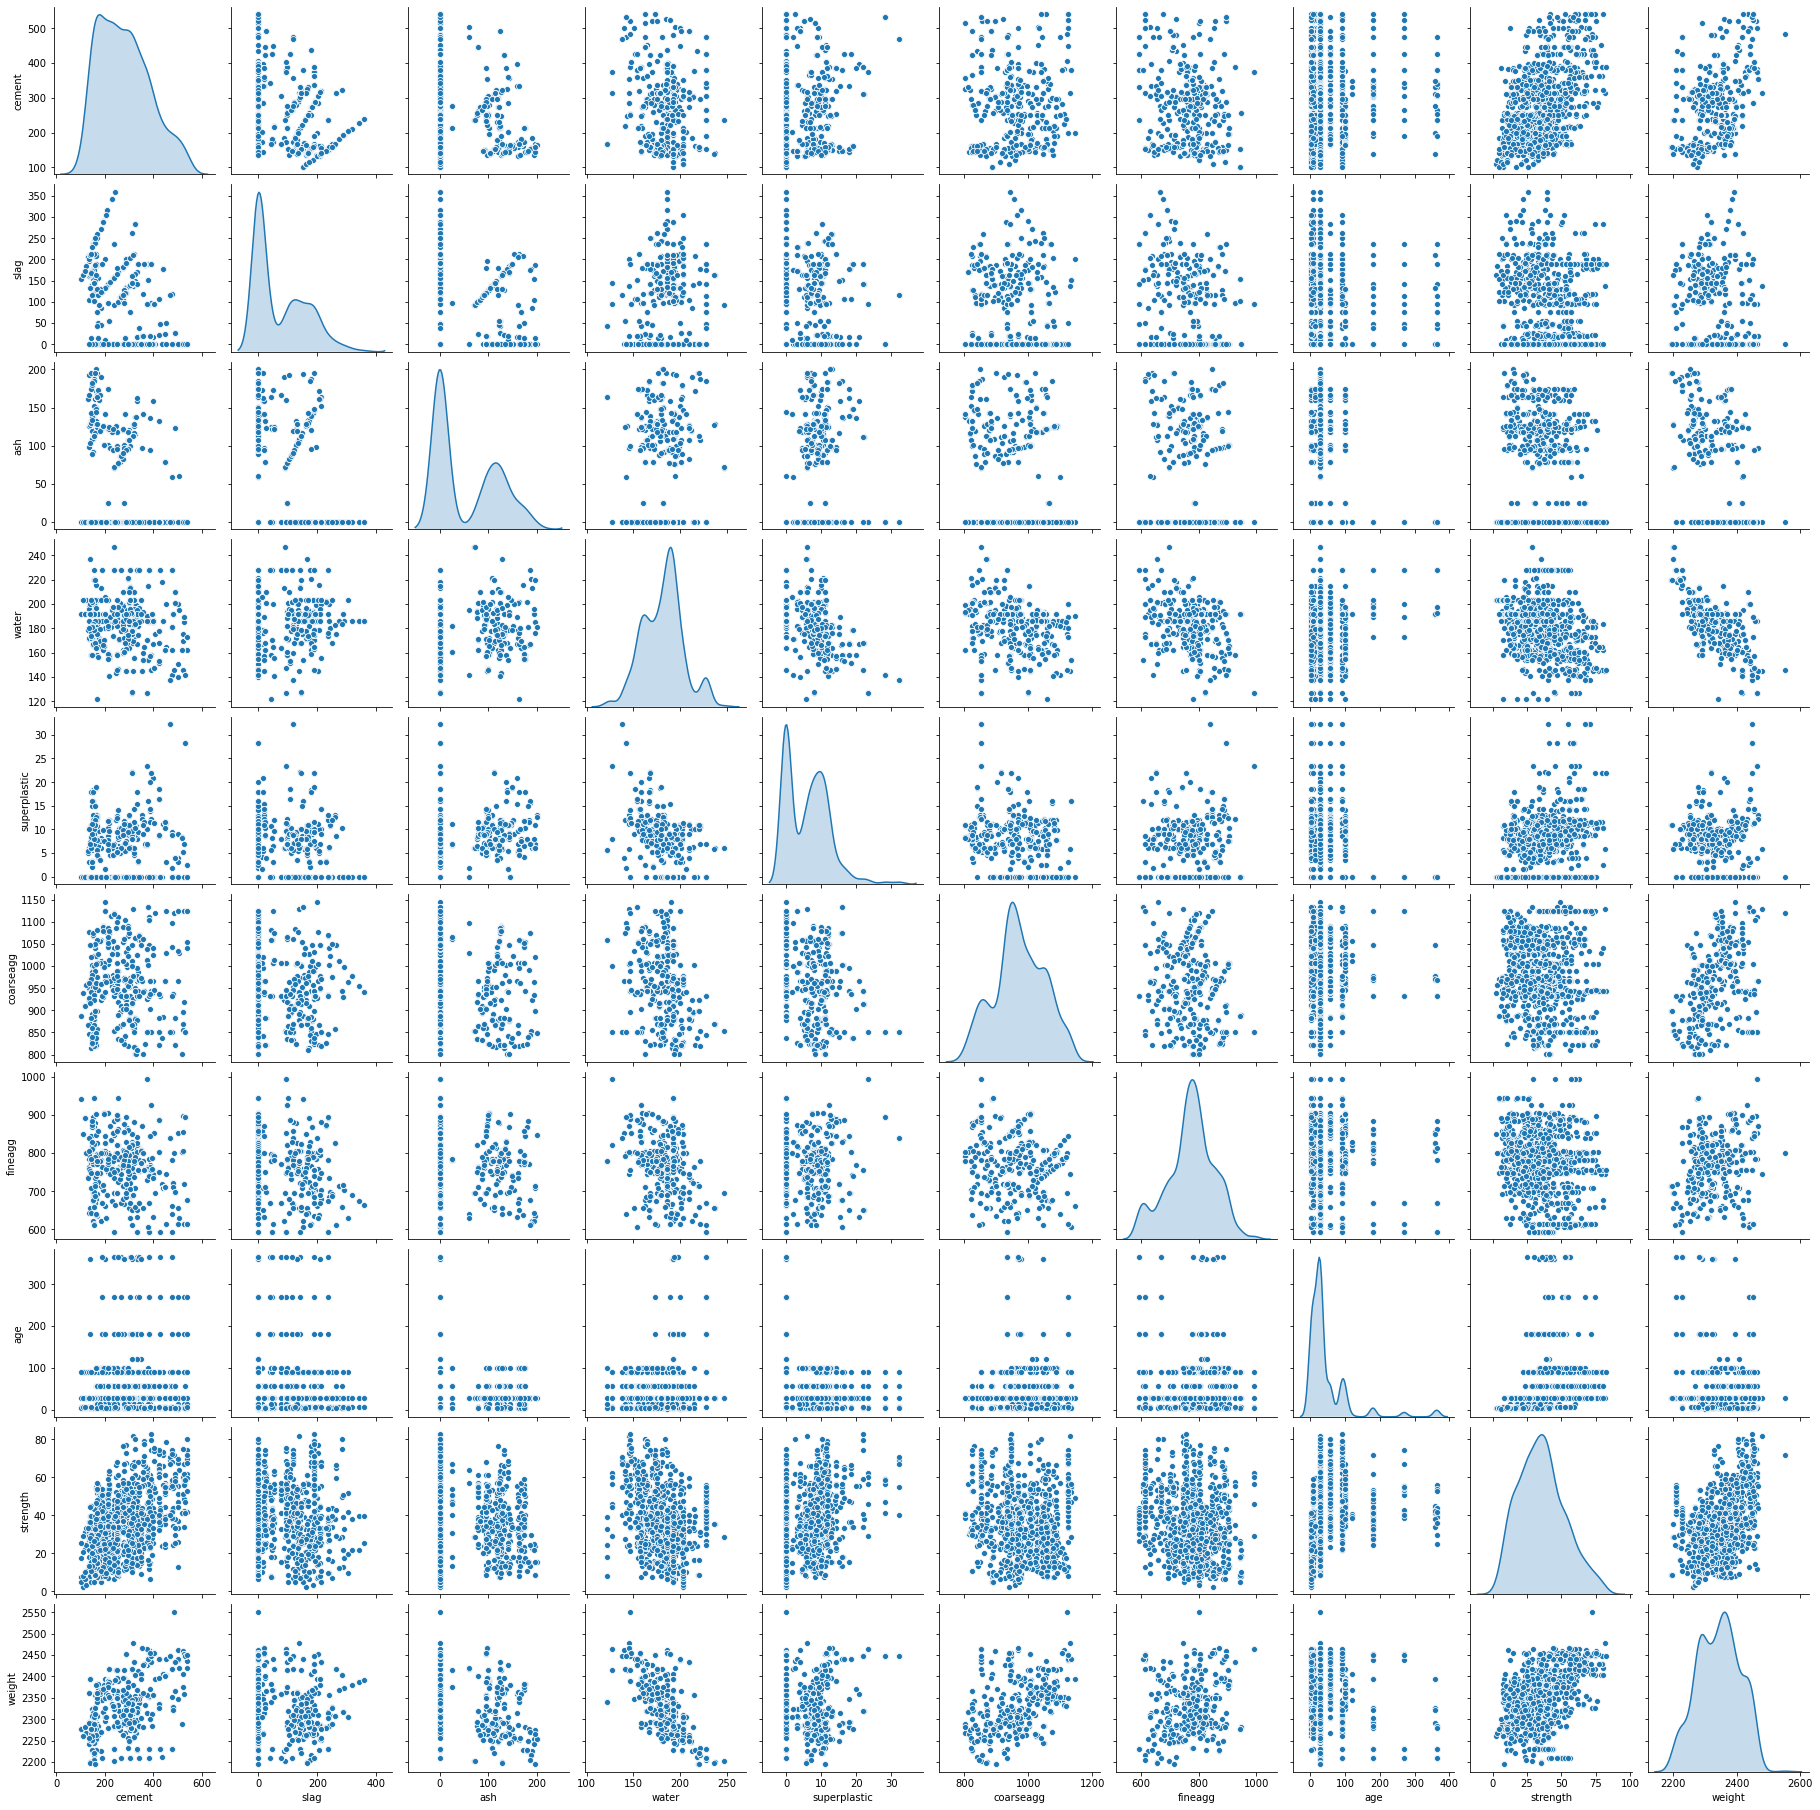

In [9]:
sns.pairplot(df, diag_kind='kde')

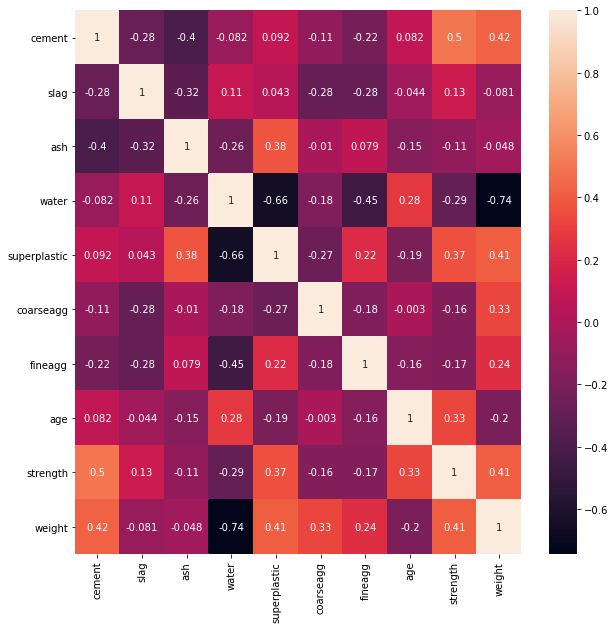

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

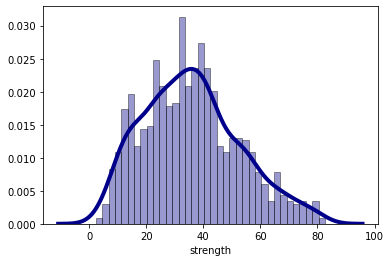

In [11]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['strength'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [12]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  weight  
0     29.89  2277.1  
1     23.51  2381.5  
2     29.22  2356.7  
3     45.85  2210.0  
4     18.29  2284.7

# Feature Engineering

In [13]:

X = df.drop('strength',axis=1)
y = df['strength']
y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64

In [14]:
# Creating a train,test,valuation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

print(X_train.count())
print(X_test.count())
print(X_val.count())

cement          618
slag            618
ash             618
water           618
superplastic    618
coarseagg       618
fineagg         618
age             618
weight          618
dtype: int64
cement          206
slag            206
ash             206
water           206
superplastic    206
coarseagg       206
fineagg         206
age             206
weight          206
dtype: int64
cement          206
slag            206
ash             206
water           206
superplastic    206
coarseagg       206
fineagg         206
age             206
weight          206
dtype: int64


In [15]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
linmod=lin.fit(X_train,y_train)
print('Linear Test Accuracy: %.3f' % linmod.score(X_test, y_test))


Linear Test Accuracy: 0.627


In [16]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
treemod0=tree.fit(X_train,y_train)
print('Tree Test Accuracy: %.3f' % treemod0.score(X_test, y_test))

Tree Test Accuracy: 0.846


In [17]:
print (pd.DataFrame(treemod0.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.100527
slag          0.049266
ash           0.017837
water         0.058136
superplastic  0.023142
coarseagg     0.046443
fineagg       0.051545
age           0.353215
weight        0.299890


In [18]:
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(base_estimator=treemod0,n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)


#### Bagging Model

In [19]:
print('bagging model traing accurecy:', bgcl.score(X_train , y_train))
print('bagging model test accurecy:', bgcl.score(X_test , y_test))

bagging model traing accurecy: 0.9838610157918879
bagging model test accurecy: 0.8755701573478475


#### AdaBoosting Model

In [20]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(base_estimator=treemod0,n_estimators=10, random_state=1)
abr=abr.fit(X_train,y_train)
print('Adaboosting model traing accurecy:', abr.score(X_train , y_train))
print('Adaboosting model test accurecy:', abr.score(X_test , y_test))

Adaboosting model traing accurecy: 0.9971014458330939
Adaboosting model test accurecy: 0.8487082667912476


#### Gradient Boosting Model

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=50, random_state=1)
gbr=gbr.fit(X_train,y_train)
print('Gradient boosting model traing accurecy:', gbr.score(X_train , y_train))
print('Gradient boosting model test accurecy:', gbr.score(X_test , y_test))

Gradient boosting model traing accurecy: 0.9232132469289055
Gradient boosting model test accurecy: 0.8708474685798274


#### Ensemble RandomForest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50, random_state=1)
rfr = rfr.fit(X_train, y_train)
print('Random Forest model traing accurecy:', rfr.score(X_train , y_train))
print('Random Forest test accurecy:', rfr.score(X_test , y_test))



Random Forest model traing accurecy: 0.9836746143476118
Random Forest test accurecy: 0.8780220762166087


## Kfold Cross-Validation

In [23]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

#### Bagging KFOLD

In [24]:
bgcl_scores = cross_val_score(bgcl, X, y, cv = kfold)
print("bgcl mean cross validation score: {}".format(np.mean(bgcl_scores)))
print("score without cv: {}".format(bgcl.score(X,y)))
bgcl_mean_cv=np.mean(bgcl_scores)
bgcl_mean_cv.astype(int)
bgcl_no_cv=bgcl.score(X,y)
bgcl_no_cv.astype(int)

bgcl mean cross validation score: 0.9057621658165538
score without cv: 0.9418721892671631


0

In [25]:
bgcl_scores = cross_val_score(bgcl, X_train, y_train, cv = kfold)
print("bgcl mean cross validation score: {}".format(np.mean(bgcl_scores)))
print("score without cv: {}".format(bgcl.score(X_train, y_train)))
bgcl_mean_cv=np.mean(bgcl_scores)
bgcl_mean_cv.astype(int)
bgcl_no_cv=bgcl.score(X_train, y_train)
bgcl_no_cv.astype(int)

bgcl mean cross validation score: 0.8638202406517241
score without cv: 0.9838610157918879


0

#### Adaboosting KFOLD

In [26]:
abr_scores = cross_val_score(abr, X_train, y_train, cv = kfold)
print("abr mean cross validation score: {}".format(np.mean(abr_scores)))
print("score without cv: {}".format(abr.score(X_train, y_train)))
abr_mean_cv=np.mean(abr_scores)
abr_mean_cv.astype(int)
abr_no_cv=abr.score(X_train, y_train)
abr_no_cv.astype(int)

abr mean cross validation score: 0.8538564724527208
score without cv: 0.9971014458330939


0

#### Gradient boosting KFOLD

In [27]:
gbr_scores = cross_val_score(gbr, X_train, y_train, cv = kfold)
print("gbr mean cross validation score: {}".format(np.mean(gbr_scores)))
print("score without cv: {}".format(gbr.score(X_train, y_train)))
gbr_mean_cv=np.mean(gbr_scores)
gbr_mean_cv.astype(int)
gbr_no_cv=gbr.score(X_train, y_train)
gbr_no_cv.astype(int)

gbr mean cross validation score: 0.8304887864194085
score without cv: 0.9232132469289055


0

####  RandomForest Regressor KFOLD

In [28]:
rfr_scores = cross_val_score(rfr, X_train, y_train, cv = kfold)
print("rfr mean cross validation score: {}".format(np.mean(rfr_scores)))
print("score without cv: {}".format(rfr.score(X_train, y_train)))
rfr_mean_cv=np.mean(rfr_scores)
rfr_mean_cv.astype(int)
rfr_no_cv=rfr.score(X_train, y_train)
rfr_no_cv.astype(int)

rfr mean cross validation score: 0.8630665674106957
score without cv: 0.9836746143476118


0

### DataFrame to compare models (Before Tuning)

In [33]:
resultsDf = pd.DataFrame({'Method':["Adaboosting",'Bagging','Gradient boosting','RandomForest'], 
                          'CV Score': [abr_mean_cv,bgcl_mean_cv,gbr_mean_cv,rfr_mean_cv],
                          'Base train Score': [abr_no_cv,bgcl_no_cv,gbr_no_cv,rfr_no_cv]})

resultsDf = resultsDf[['Method', 'CV Score','Base train Score']]
resultsDf


Method  CV Score  Base train Score
0        Adaboosting  0.853856          0.997101
1            Bagging  0.863820          0.983861
2  Gradient boosting  0.830489          0.923213
3       RandomForest  0.863067          0.983675

## Grid Search & Random Search


In [30]:
DR=DecisionTreeRegressor()
DR.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Gridsearch
std_slc = StandardScaler()

ImportError: cannot import name 'Gridsearch' from 'sklearn.preprocessing' (C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
pca = decomposition.PCA()

In [ ]:
dec_tree =DecisionTreeRegressor()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ["mse", "friedman_mse", "mae"]
max_depth = [2,4,6,8,10,12]


In [ ]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

dec_tree_GS = GridSearchCV(pipe, parameters)
dec_tree_GS.fit(X, y)     
y_predict=dec_tree_GS.predict(X_test)
dec_tree_GS.best_params_

In [ ]:
 from sklearn.metrics import accuracy_score
dec_train=dec_tree_GS.score(X_train,y_train)
dec_test=dec_tree_GS.score(X_test,y_test)
dec_val=dec_tree_GS.score(X_val,y_val)
tree_train=treemod0.score(X_train,y_train)
tree_test=treemod0.score(X_test,y_test)
tree_val=treemod0.score(X_val,y_val)

In [ ]:
resultsgrid = pd.DataFrame({'Method':["Grid CV Dtree",'Base Dtree Model'], 
                          'Training Score': [dec_train,tree_train],
                          'Testing Score': [dec_test,tree_test],
                           'Validation Score':[dec_val,tree_val]})

resultsgrid = resultsgrid[['Method', 'Training Score','Testing Score','Validation Score']]
resultsgrid


In [ ]:
from sklearn.metrics import r2_score


## Report Summary

Zero values in the data set were no replaced because, Slag, Ash, and Superplastic are considered Add-Mixtures. Add-Mixtures are used to reduce cure time, lower water content, and reduce greenhouse gas emissions. A zero value in one of these columns is not 
irregular to a  concrete mix design. 

It was concluded  after tunning the model's hyperparameters using grid search CV the best predictive model for this data set was "Decession tree Regressor." producing an accuracy score on our test data set of 99.1%

## GitHub Link

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-c4bantle/blob/master/Concrete%20Strength%20Predictions%20%20.ipynb